<div class="alert alert-block alert-info" style="margin-top: 20px"><h1>Logistic regression</h1>
<code>By AKSHAY KASHYAP</code></div>

<hr><div class="alert alert-block alert-danger" style="margin-top: 20px"><h3>Logistic regression</h3></div>
<hr>
<div>
<code>Logistic regression</code> is a <code>statistical</code> method for <code>binary classification</code> that models the<br>
    probability of a binary outcome (e.g., yes/no, 0/1) using predictor variables. It employs<br>
    a logistic function to transform a linear combination of predictors into a probability score<br>
    between 0 and 1. The model <code>estimates coefficients</code> that indicate the <code>strength</code> and <code>direction</code> of<br>
    the relationships between predictors and the likelihood of the binary outcome.<hr>
    <code>f<sub>w,b</sub>(x) = 1/(1 + e<sup>-(wx + b)</sup>)</code> <hr>
    <li>w is weight</li>
    <li>b is bias</li>
    <li>e is Euler's number (2.7182818)</li>
    <li>x is input or independent variable</li><hr>
</div>

from `sklearn.linear_model` import `LogisticRegression`
___________

Importing some libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical computing
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns

In [3]:
# Importing datasets (comes with scikit-learn)
from sklearn.datasets import load_digits

In [4]:
# loading dataset from local computer (using pandas)
df = pd.read_csv("ML_data/age_insurance.csv",header=0)

In [5]:
df

,age,have_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


Code to visualize dataset and line

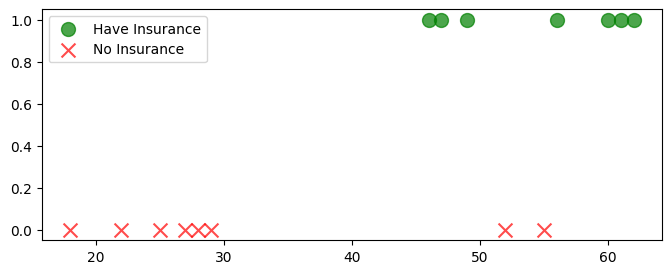

In [6]:
fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(df[df['have_insurance'] == 1]['age'], 
           df[df['have_insurance'] == 1]['have_insurance'],
           color='green', label='Have Insurance', marker='o', s=100, alpha=0.7)

# Plot points where have_insurance is 0
ax.scatter(df[df['have_insurance'] == 0]['age'], 
           df[df['have_insurance'] == 0]['have_insurance'],
           color='red', label='No Insurance', marker='x', s=100, alpha=0.7)
ax.legend()
plt.show()

<hr><p><code>Sigmoid</code> funtion always results between 0 and 1</p><hr>

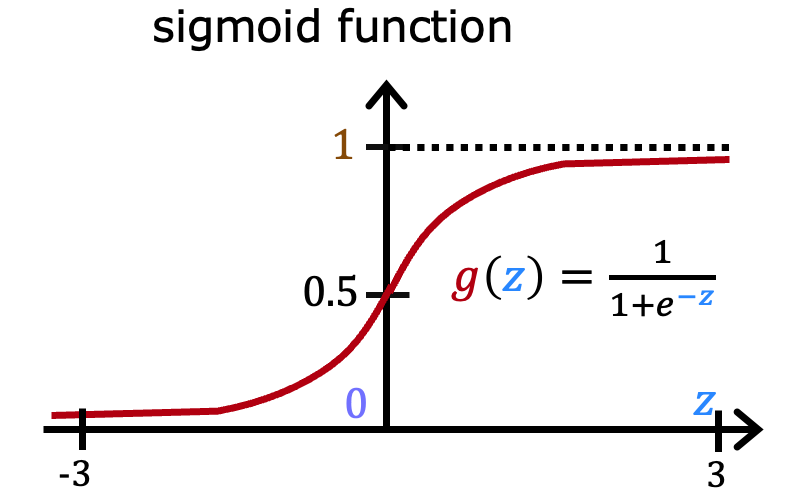

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.have_insurance, train_size=0.9)

In [8]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [9]:
model.score(X_test,y_test)

0.5

In [10]:
model.predict_proba(X_test)

array([[0.07658931, 0.92341069],
       [0.97692531, 0.02307469]])

In [11]:
model.predict([[50]])[0]

C:\Users\Akshay Kashyap\Envs\datascience\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

<hr>Generate CSV file with list of predictions<hr>

In [12]:
let_age = np.array([25,55,26,78,32])

`Note:` here we reshape , beacause model expect multidimensional array

In [13]:
predict = model.predict(let_age.reshape(-1, 1))
predict

C:\Users\Akshay Kashyap\Envs\datascience\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1, 0, 1, 0], dtype=int64)

In [14]:
x = {
    'age' : let_age,
    'have_insurance_predicted' : predict
}

In [15]:
df_predicted = pd.DataFrame(x)
df_predicted

,age,have_insurance_predicted
0,25,0
1,55,1
2,26,0
3,78,1
4,32,0


`("ML_data/predicted.csv", index=False)`<br>
* `ML_data` is folder in the same directory as this file (`"02_logistic_regression.ipynb"`) is,<br>
* `predicted.csv` is the name of our exported file <br>
* `index=True` will create another addition column for index 

In [16]:
df_predicted.to_csv("ML_data/predicted.csv", index=False)

<hr><div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>Multi-class Classification , e.g.<code>(Digit classification)</code></h3</div>

<p style="color:cyan">Importing datasets (comes with scikit-learn) #imported on top code/cell</p>
from sklearn.datasets import load_digits 

In [17]:
# loading dataset
digits = load_digits()

# list containing the names of all attributes and methods of the digits dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [18]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

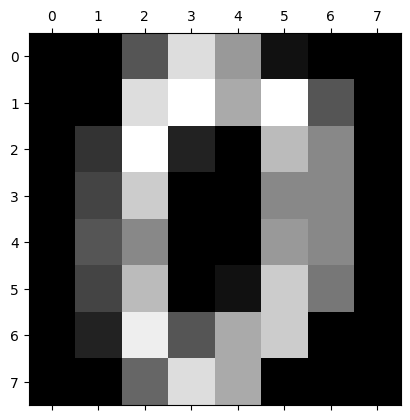

In [19]:
plt.gray()
plt.matshow(digits.images[0])

<Figure size 640x480 with 0 Axes>

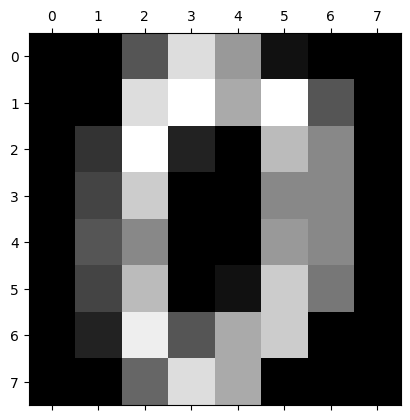

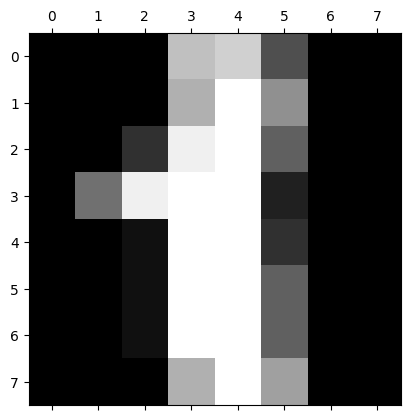

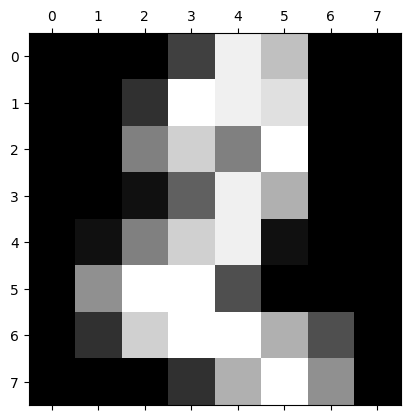

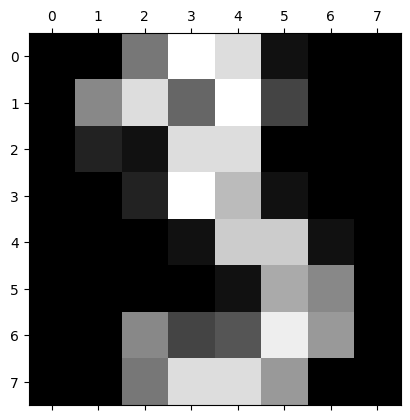

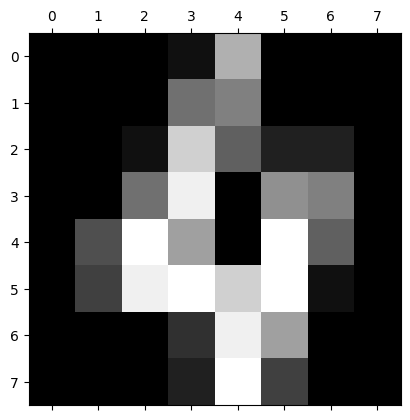

In [20]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

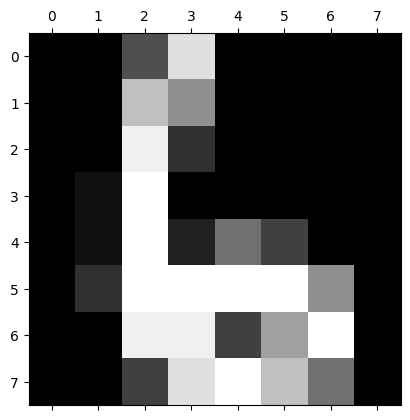

In [21]:
plt.matshow(digits.images[67])

In [22]:
digits.target[67] # here we are checking data manually , so we can match when model predict 

6

In [39]:
digits.target[65:70]

array([6, 6, 6, 4, 9])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(digits['data'],digits['target'],train_size=0.8)

In [24]:
model_2 = LogisticRegression(max_iter=1500)

In [25]:
model_2.fit(X_train,y_train)

LogisticRegression(max_iter=1500)

In [30]:
model_2.predict([digits.data[67]]) # predicted data , match with aboves

array([6])

In [33]:
model_2.score(X_test,y_test)

0.9944444444444445

In [35]:
model_2.predict_proba(X_test)

array([[1.48880354e-13, 6.74479670e-07, 1.77730771e-07, ...,
        9.99998657e-01, 2.02520610e-10, 1.31092473e-12],
       [1.96451697e-10, 9.99811711e-01, 1.38668634e-13, ...,
        2.35927642e-08, 3.82595931e-06, 6.80547806e-05],
       [5.37187757e-10, 5.27495360e-06, 9.99743495e-01, ...,
        3.73263849e-09, 8.04610659e-10, 7.54920916e-13],
       ...,
       [4.60233889e-13, 4.94963810e-15, 9.99775122e-01, ...,
        1.00432251e-12, 8.34977720e-11, 4.80725913e-14],
       [1.22734006e-11, 5.60284428e-14, 7.40004356e-16, ...,
        2.68980824e-14, 2.08060408e-08, 2.23431191e-10],
       [5.40767724e-04, 2.24379658e-06, 9.86194792e-10, ...,
        9.98471424e-01, 3.19620603e-09, 2.94208362e-04]])

In [37]:
y_predict = model_2.predict(X_test)

In [40]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

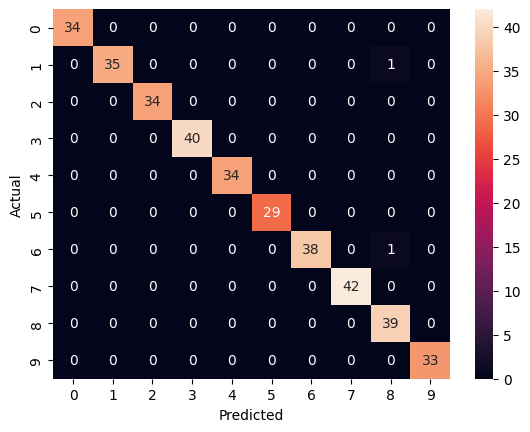

In [43]:
# visualization of cm
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show;